In [1]:
import pandas as pd

IBM = '/kaggle/input/historical-ibm-stock-price-data/IBM.csv'
df = pd.read_csv(filepath_or_buffer=IBM, index_col=[0])
df.head()

,open,high,low,close,volume
0,232.69,233.00,229.13,230.12,3799271
1,228.40,234.39,227.80,231.72,4769531
2,238.00,239.35,228.91,230.00,4970449
3,234.43,238.38,234.22,238.04,4028430
4,233.55,236.52,233.46,234.75,4791116


Before we proceed let's look at our price correlations.

In [2]:
df[['open', 'high', 'low', 'close', 'volume']].corr()

,open,high,low,close,volume
open,1.000000,0.999552,0.999541,0.999117,-0.391545
high,0.999552,1.000000,0.999356,0.999568,-0.382921
low,0.999541,0.999356,1.000000,0.999561,-0.401029
close,0.999117,0.999568,0.999561,1.000000,-0.391931
volume,-0.391545,-0.382921,-0.401029,-0.391931,1.000000


We don't have any dates, so we can't build a time series. But we have four prices, and they look like daily prices, because their price correlations are nearly but not exactly 1.0. And the price/volume correlations are negative, and larger in magnitude than we typically see.

<Axes: xlabel='close', ylabel='volume'>

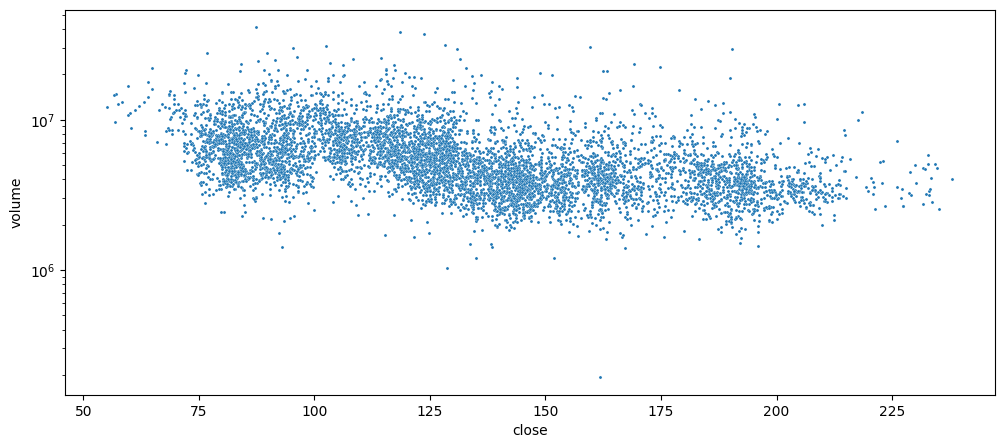

In [3]:
import matplotlib.pyplot as plt
from seaborn import scatterplot

FIGSIZE = (12, 5)
plt.figure(figsize=FIGSIZE)
plt.yscale(value='log')
scatterplot(data=df, x='close', y='volume', s=5)

Here we see that generally the log of the volume declines as prices rise. There's not much else we can say about this dataset.

<Axes: xlabel='close', ylabel='volume'>

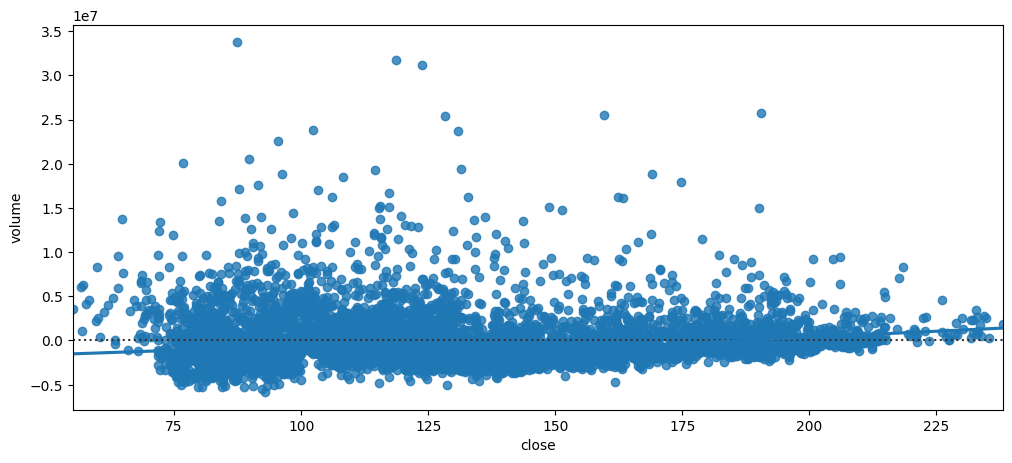

In [4]:
from seaborn import residplot

plt.figure(figsize=FIGSIZE)
residplot(data=df, x='close', y='volume', lowess=True, )

It seems unlikely that trading volumes would ever actually be negative. Does our dataset contain negative volumes?

In [5]:
df['volume'].min()

192843

No, despite what we see in the residplot above, our scatterplot is telling us something more reasonable: we have one weird-looking daily volume, but everything else looks pretty reasonable.

In [6]:
df['volume'].value_counts(bins=12).to_frame().sort_index()

,count
"(151828.54200000002, 3610714.417]",1417
"(3610714.417, 7028585.833]",3284
"(7028585.833, 10446457.25]",1103
"(10446457.25, 13864328.667]",340
"(13864328.667, 17282200.083]",96
"(17282200.083, 20700071.5]",44
"(20700071.5, 24117942.917]",18
"(24117942.917, 27535814.333]",6
"(27535814.333, 30953685.75]",7
"(30953685.75, 34371557.167]",1


It looks odd that our bins wouldn't include something close to zero. Let's look at a histogram.

<Axes: ylabel='Frequency'>

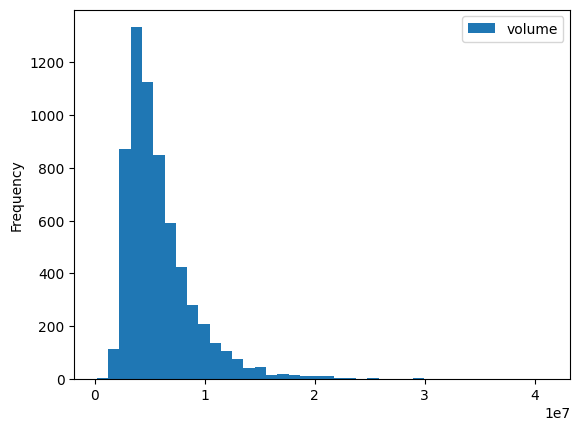

In [7]:
df[['volume']].plot(kind='hist',bins=40)

Let's look at the few smallest volume counts.

In [8]:
sorted(df['volume'].values)[:8]

[192843, 1027500, 1193025, 1202087, 1397455, 1408500, 1415840, 1450400]

We have one odd-looking daily volume that is nearly zero in units of 1e6.